In [1]:
import cv2

# 读取图片
image = cv2.imread("D:\picture\school.png")  # 替换为你的图片路径

# 将BGR转换为RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 获取整张图像的RGB值
# 这会返回一个包含每个像素RGB值的三维数组
print(image_rgb)

# 例如，获取(100, 50)位置的RGB值
pixel_value = image_rgb[100, 50]
print(f"Pixel (50, 100) RGB value: {pixel_value}")


<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\32217\AppData\Local\Temp\ipykernel_30172\3702428533.py:4: SyntaxWarning: invalid escape sequence '\p'
  image = cv2.imread("D:\picture\school.png")  # 替换为你的图片路径


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[160 170 196]
  [159 169 196]
  [165 175 202]
  ...
  [ 92 125 166]
  [ 92 125 166]
  [255 255 255]]

 [[155 164 191]
  [155 164 191]
  [161 171 198]
  ...
  [ 90 124 165]
  [ 90 124 165]
  [255 255 255]]

 ...

 [[ 88 114 111]
  [ 89 116 112]
  [ 88 114 110]
  ...
  [ 95 126 118]
  [ 97 127 120]
  [255 255 255]]

 [[ 84 111 106]
  [ 84 110 106]
  [ 85 111 106]
  ...
  [ 98 128 120]
  [100 129 121]
  [255 255 255]]

 [[ 86 113 108]
  [ 87 114 109]
  [ 91 118 112]
  ...
  [101 130 122]
  [101 130 122]
  [255 255 255]]]
Pixel (50, 100) RGB value: [175 184 211]


<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
C:\Users\32217\AppData\Local\Temp\ipykernel_12524\892568685.py:6: SyntaxWarning: invalid escape sequence '\p'
  image = cv2.imread("D:\picture\school.png")  # 替换为你的图片路径


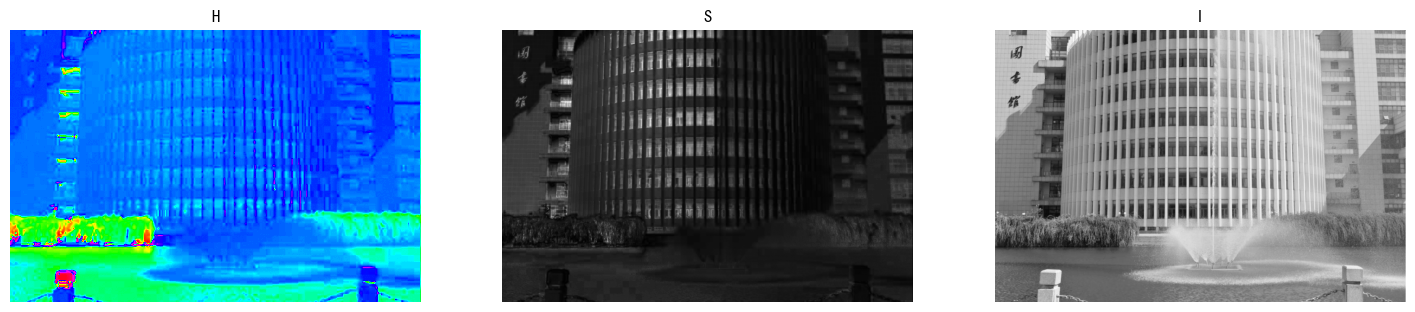

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
image = cv2.imread("D:\picture\school.png")  # 替换为你的图片路径

# 将BGR转换为RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
# 定义函数，将RGB转换为HSI
def rgb_to_hsi(rgb_img):
    # 将RGB值归一化到[0, 1]
    rgb_img = rgb_img / 255.0
    r, g, b = cv2.split(rgb_img)
    
    # 计算强度 I
    I = (r + g + b) / 3.0
    
    # 计算饱和度 S
    min_val = np.minimum(np.minimum(r, g), b)
    S = 1 - (3 / (r + g + b + 1e-7) * min_val)
    
    # 计算色调 H
    num = 0.5 * ((r - g) + (r - b))
    den = np.sqrt((r - g) ** 2 + (r - b) * (g - b))
    theta = np.arccos(num / (den + 1e-7))
    
    H = np.zeros_like(r)
    H[b <= g] = theta[b <= g]
    H[b > g] = (2 * np.pi - theta[b > g])
    
    # 将H从弧度转换为角度
    H = H / (2 * np.pi)
    
    # 将H, S, I合并
    HSI_img = cv2.merge([H, S, I])
    
    return H, S, I

# 获取HSI分量
H, S, I = rgb_to_hsi(image_rgb)

# 显示HSI分量
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(H, cmap='hsv')
ax[0].set_title('H')
ax[0].axis('off')

ax[1].imshow(S, cmap='gray')
ax[1].set_title('S')
ax[1].axis('off')

ax[2].imshow(I, cmap='gray')
ax[2].set_title('I')
ax[2].axis('off')

plt.show()


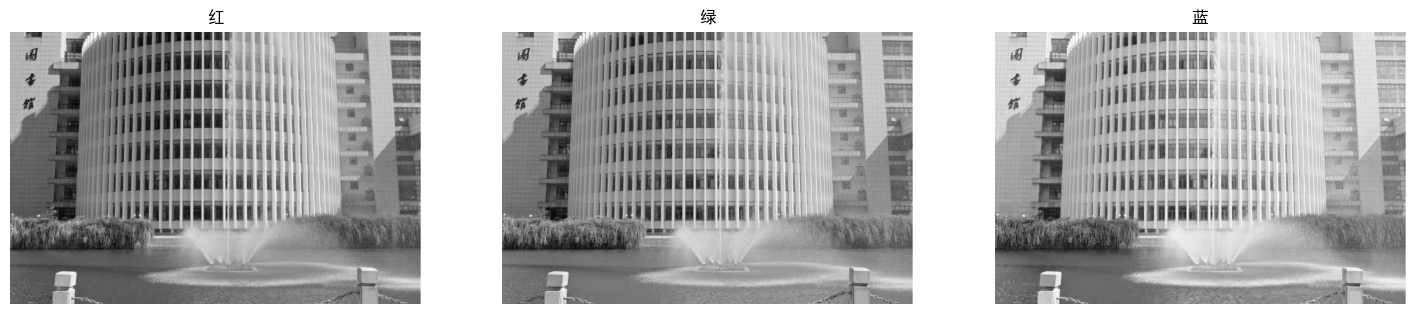

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# 提取 R、G、B 分量
(B, G, R) = cv2.split(image)  # 注意这里是 BGR 顺序，OpenCV 使用 BGR 排列

# 显示 R、G、B 分量
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# 显示 Red 通道
ax[0].imshow(R, cmap='gray')  # 使用灰度显示单通道
ax[0].set_title('红')
ax[0].axis('off')

# 显示 Green 通道
ax[1].imshow(G, cmap='gray')
ax[1].set_title('绿')
ax[1].axis('off')

# 显示 Blue 通道
ax[2].imshow(B, cmap='gray')
ax[2].set_title('蓝')
ax[2].axis('off')

plt.show()
